In [1]:
# 配置日志
import logging
import logging.config
import yaml
with open('.conf/logging.yml', 'r') as f_conf:
    dict_conf = yaml.safe_load(f_conf)
logging.config.dictConfig(dict_conf)

filepath = 'logs/'
del_list = os.listdir(filepath)
for f in del_list:
    file_path = os.path.join(filepath, f)
    if os.path.isfile(file_path):
        os.remove(file_path)


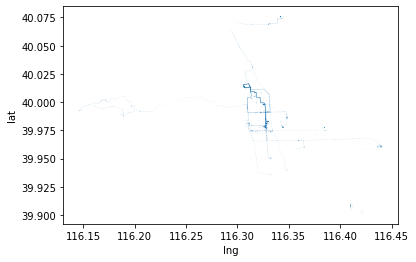

In [1]:
from DPC import DPCLink
from utils.load import *
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import itertools

# 读取文件为迭代器, 可指定读取数量
dataset_path = 'dataset/Geolife Trajectories 1.3/Data/001/'
dataset = enumerate(itertools.islice(LoadG(dataset_path), 0, None))

# 读取数据
ls = []
dfs = pd.DataFrame()
for i, df in dataset:
    df['trackID'] = i + 1
    dfs = pd.concat([dfs, df], ignore_index=True)
dfs.reset_index(drop=True)
dfs.plot.scatter(x='lng', y='lat', s=0.0001)

# 可视化轨迹在地图上
m = folium.Map(location=[39.984094, 116.319236], zoom_start=16)
ls = []
dataset = enumerate(itertools.islice(LoadG(dataset_path), 0, None))
for i, df in dataset:
    l = [[lat, lng]for [lat, lng, *_] in df.values]
    folium.PolyLine(l, weight=0.4).add_to(m)
    ls.extend(l)
HeatMap(ls).add_to(m)
m.save('map/df.html')

# 初始化类, 后续运算都通过此类操作
dpc = DPCLink(dfs)

# dpc.calDis()


In [9]:
for track in dfs.groupby('trackID'):
    print('track'+str(track[0])+': '+str(len(track[1]))+' points  ')


track1: 81 points  
track2: 178 points  
track3: 590 points  
track4: 307 points  
track5: 270 points  
track6: 69 points  
track7: 42 points  
track8: 9 points  
track9: 54 points  
track10: 28 points  
track11: 21 points  
track12: 61 points  
track13: 166 points  
track14: 124 points  
track15: 310 points  
track16: 162 points  
track17: 45 points  
track18: 40 points  
track19: 55 points  
track20: 158 points  
track21: 63 points  
track22: 477 points  
track23: 22 points  
track24: 46 points  
track25: 242 points  
track26: 318 points  
track27: 206 points  
track28: 66 points  
track29: 27 points  
track30: 135 points  
track31: 70 points  
track32: 42 points  
track33: 55 points  
track34: 82 points  
track35: 472 points  
track36: 233 points  
track37: 84 points  
track38: 253 points  
track39: 58 points  
track40: 13 points  
track41: 69 points  
track42: 72 points  
track43: 149 points  
track44: 59 points  
track45: 72 points  
track46: 61 points  
track47: 41 points  
track

In [3]:

dpc.calDc(p=0.01)
dpc.calRho()

dpc.calDel()
dpc.calGam()
dpc.getCen(10)

dpc.cluster()


dpc.DPC.calDc    INFO     Calculate dc by method proportion
dpc.DPC.calDc    INFO     Cut-off distance calculated successfully as 0.1264586688200089 with proportion
dpc.DPCL.calRho  INFO     Local density calculated with method gaussian
dpc.DPCL.calDel  INFO     The point of maximum density: 1288
dpc.DPCL         INFO     Gamma calculating
dpc.DPCL         INFO     10 center points: [1288 4969 4738 1059  533 6704 3810 5286 5498 7544]
dpc.DPC.cluster  INFO     2770points in cluster 1 with center point 1288
dpc.DPC.cluster  INFO     387points in cluster 2 with center point 4969
dpc.DPC.cluster  INFO     2581points in cluster 3 with center point 4738
dpc.DPC.cluster  INFO     203points in cluster 4 with center point 1059
dpc.DPC.cluster  INFO     420points in cluster 5 with center point 533
dpc.DPC.cluster  INFO     130points in cluster 6 with center point 6704
dpc.DPC.cluster  INFO     369points in cluster 7 with center point 3810
dpc.DPC.cluster  INFO     1072points in cluster 8 with ce

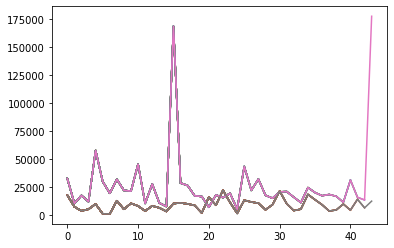

In [52]:
import matplotlib.pyplot as plt
from distance import calc_azimuth
import logging
import math
l = logging.getLogger('TE')
for cID, c in dpc.df.groupby('clusterID'):
    ilist = list(c.index.values)

    tmp = []
    thetas = []
    eis = []
    vars = []
    for i in range(len(ilist)-1):

        if ilist[i+1]-ilist[i] == 1:
            theta = calc_azimuth(dpc.df.iloc[i].lat, dpc.df.iloc[i].lng, dpc.df.iloc[i+1].lat, dpc.df.iloc[i+1].lng)
            thetas.append(theta)

            tmp.append(i)
        else:
            # l.info(thetas)
            ei = sum([x*math.log10(x) if x != 0 else 0.0 for x in thetas])
            var = np.var(np.array(thetas))
            # dpc.df.loc[tmp].plot.scatter(x='lng', y='lat')

            # l.info('Entropy Index: '+str(ei))
            # l.info('Var: '+str(var))
            eis.append(ei)
            vars.append(var)
            plt.plot(eis)
            plt.plot(vars)

            thetas = []
            tmp = []
            # break

    # esub(dpc.df.loc[tmp])
    break

# x = [x for x in range(len(eis))]
# print(x)
# print(eis)
# plt.plot(x, eis)
# plt.plot(vars)
# plt.show()


In [52]:
print(dfc.loc[:99,['lat','lng']])

          lat         lng
40  40.004936  116.318786
41  40.005527  116.317748
42  40.006818  116.317729
43  40.008125  116.317645
44  40.008831  116.316931
45  40.009559  116.315910
46  40.010150  116.314706
47  40.009178  116.312728
48  40.010498  116.312573
49  40.011315  116.312443
50  40.011729  116.311952


In [51]:
sq = [1, 1, 360]
import math
_ei(sq, d=10)


0.6365141682948128

In [50]:
def _ei(sq, d):
    """计算一个序列的混乱指数, d为分组数"""

    # 生成分组区间
    ndNs = {}
    for l, r in Two(np.linspace(0, 360, d+1)):
        ndNs[str(l)+'-'+str(r)] = []
        ndNs[str(l)+'-'+str(r)].append(pd.Interval(left=l, right=r, closed='right'))
        ndNs[str(l)+'-'+str(r)].append(0)

    # 计算落入区间内数量
    for s in sq:
        for n in ndNs:
            if s in ndNs[n][0]:
                ndNs[n][1] = ndNs[n][1]+1
    ndNs = [ndNs[n][1] for n in ndNs]
    ndNs = [x/sum(ndNs)for x in ndNs]

    ei = -sum([x*math.log(x, math.e) for x in ndNs if x != 0])
    return ei


In [72]:
a = iter(dpc.df.groupby('clusterID'))


<AxesSubplot:xlabel='lng', ylabel='lat'>

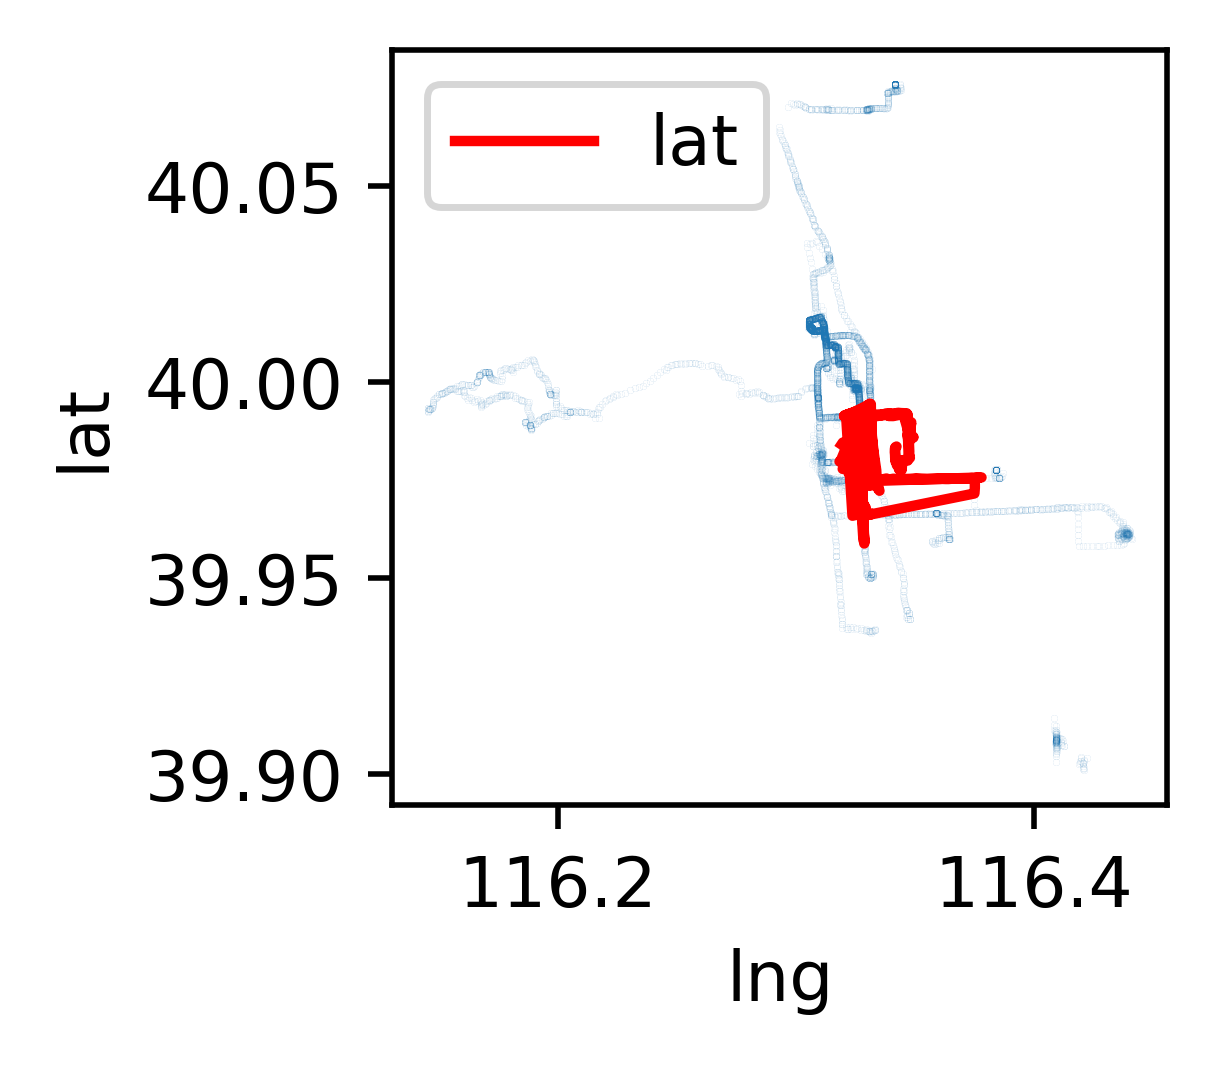

In [140]:
id, dfc = next(a)
fig, ax = plt.subplots(figsize=(2, 2), dpi=500)
dpc.df.plot.scatter(x='lng', y='lat', s=0.0001, ax=ax)
dfc.plot.line(x='lng', y='lat', c='red', ax=ax)


In [141]:
s = int(dfc.index[0])
b = FourDf(dfc)


0.5982695885852573
[2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513, 2514, 2515, 2516]


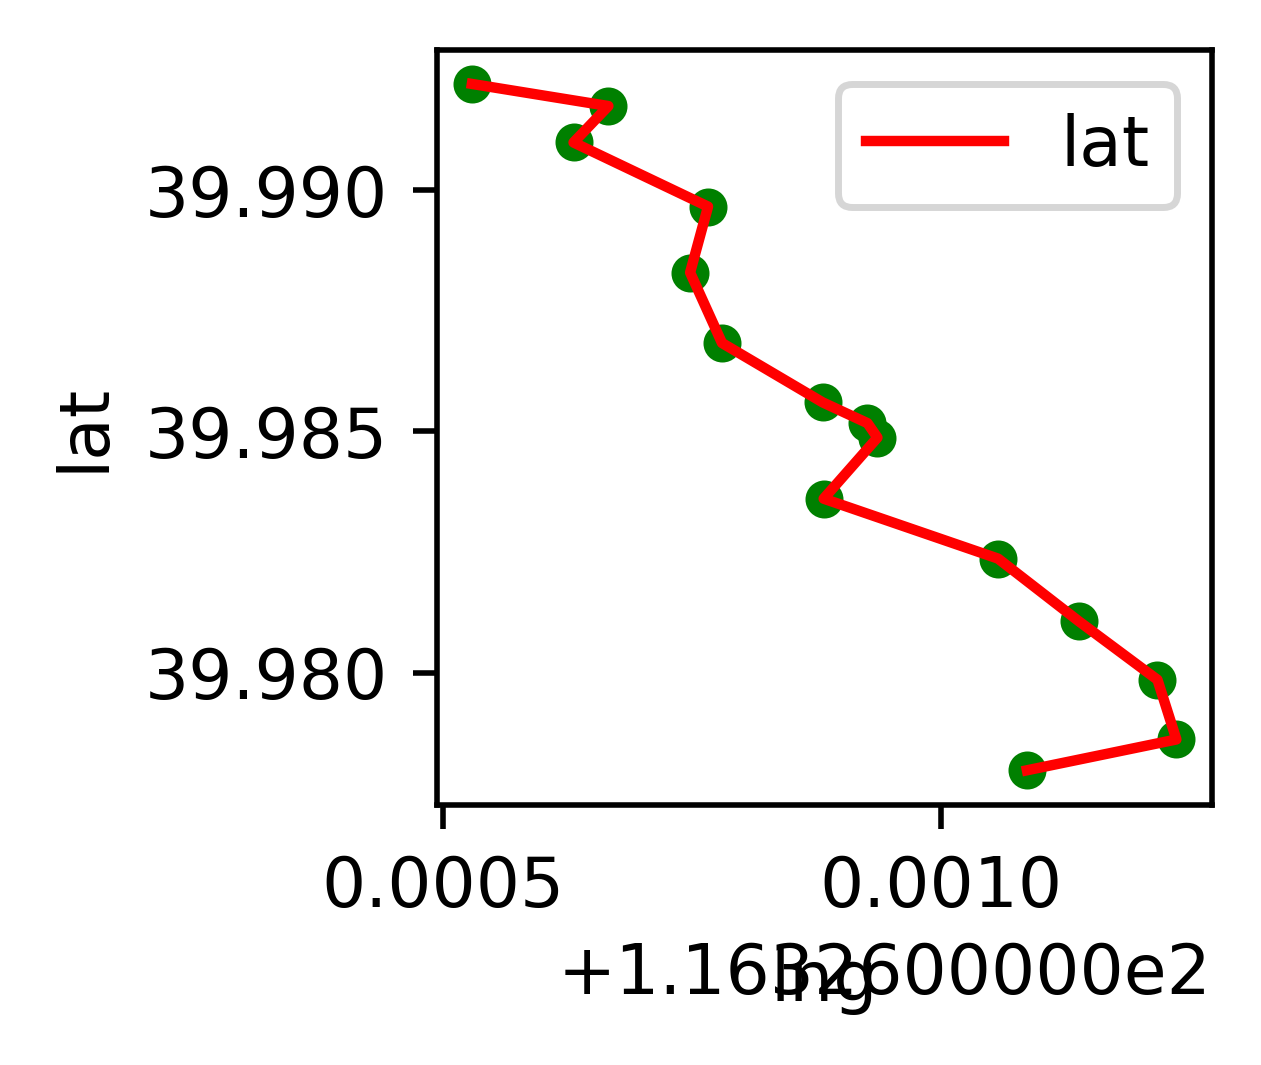

In [162]:
(ib, ia), (tb, ta) = next(b)
while(ib == ia-1 and tb == ta):
    (ib, ia), (tb, ta) = next(b)

fig, ax = plt.subplots(figsize=(2, 2), dpi=500)
# dpc.df.plot.scatter(x='lng', y='lat', s=0.0001, ax=ax)
dfc.loc[s:ib].plot.line(x='lng', y='lat', c='red', ax=ax)
dfc.loc[s:ib].plot.scatter(x='lng', y='lat', c='g', ax=ax)
print(_ei(list(t for t in Df2T(dfc.loc[s:ib])), d=10))
print(dfc.loc[s:ib].index.tolist())
s = ia

In [ ]:
while(ib == ia-1 and tb == ta):
    (ib, ia), (tb, ta) = next(b)

fig, ax = plt.subplots(figsize=(2, 2), dpi=500)
# dpc.df.plot.scatter(x='lng', y='lat', s=0.0001, ax=ax)
dfc.loc[s:ib].plot.line(x='lng', y='lat', c='red', ax=ax)
print(_ei(list(t for t in Df2T(dfc.loc[s:ib])), d=10))


In [ ]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=500)
dpc.df.plot.scatter(x='lng', y='lat', s=0.0001, ax=ax)
dfc.plot.line(x='lng', y='lat', c='red', ax=ax)


In [18]:
from utils.itertool import *
logger = logging.getLogger('DPCL_TE')

for id, dfc in dpc.df.groupby('clusterID'):
    # print(dfc.index.tolist())

    s = int(dfc.index[0])
    for (ib, ia), (tb, ta) in FourDf(dfc):
        # index before and after, trackID before and after

        if ib != ia-1 or tb != ta:
            logger.debug('break points: '+str(ib)+', '+str(ia))
            logger.debug('cutting list: '+str(dfc.loc[s:ib].index.tolist()[0])+', '+str(dfc.loc[s:ib].index.tolist()[-1]))

            if _ei(list(t for t in Df2T(df))) > threshold:
            break
            # print()
            s = ia
        elif ia == dfc.iloc[-1].name:
            logger.debug('cutting list: '+str(dfc.loc[s:ia].index.tolist()[0])+', '+str(dfc.loc[s:ia].index.tolist()[-1]))

            # break

    # for i in range(dfc.shape[0]):
    #     print(dfc.loc[0,index])
    break
# b = next(a)[1]
# b = iter(b.groupby('trackID'))
# for i in b:
#     print(i[0])


[264.53558070146255, 111.42868020175149, 119.64041711082103, 84.49994910363813, 86.55700951305676, 131.3366434499717, 171.30469469016543, 162.4583570339214, 145.33176336757322, 84.52786484017815, 114.92485317156616, 95.39629568385669, 179.3645725513495, 177.86017597781483, 178.16670222313076, 123.74826585827043, 86.90699274973838, 137.40372435259383, 176.67563900076118, 177.46547054090274, 174.22958126850938, 129.32683089529547, 87.75992196762411, 106.50762154409318, 162.4670354074483, 179.96674770162986, 172.2987067102615, 181.94776089108058, 177.76571504324204, 181.48952085794363, 175.12684273600473, 174.09478577255913, 180.86526145065972, 178.308361667771, 176.2453147642566, 178.92937860104053, 180.73275384716078, 177.36490055439867, 174.43377922593731, 178.60967004436816, 177.9933523481177, 182.03178273990812, 183.24874631560408, 246.70767296481202]


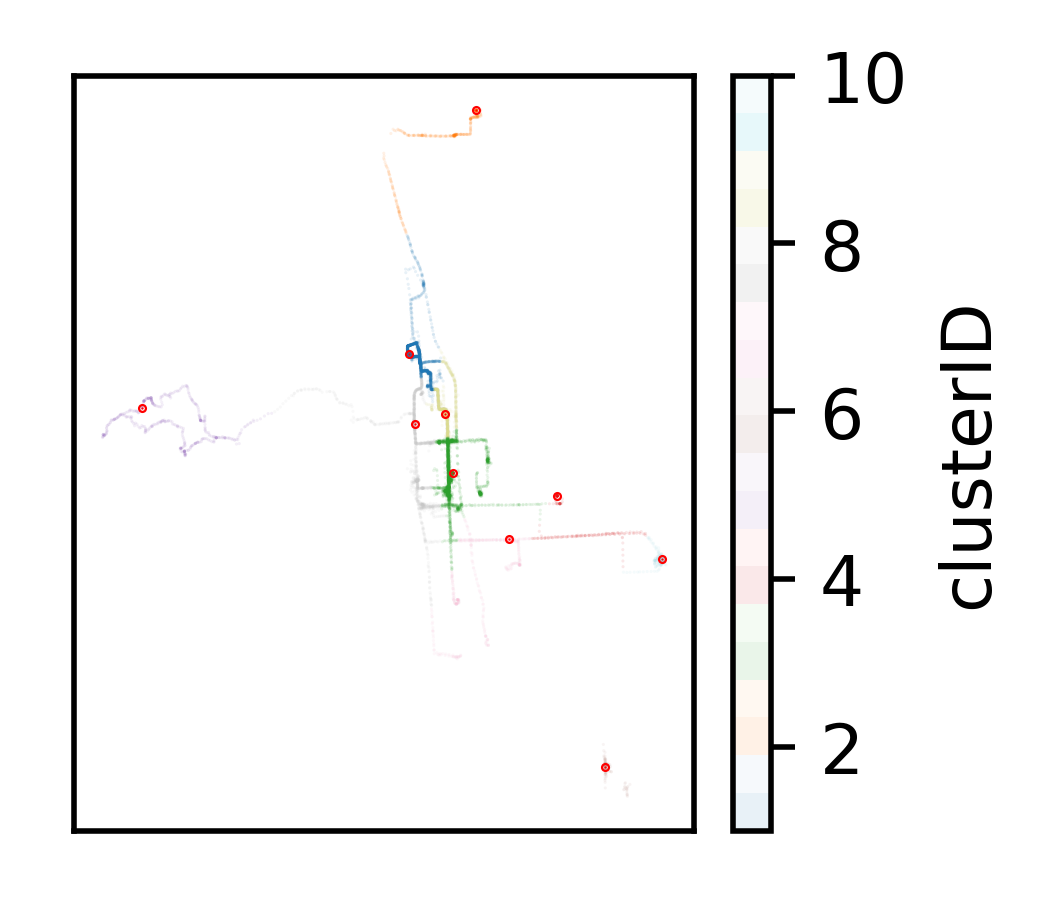

In [6]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=500)
dpc.df.plot.scatter(x='lng', y='lat', c='clusterID', colormap='tab20', s=0.2, alpha=0.1, linewidths=0, ax=ax)
# dfs.plot.scatter(x='lng', y='lat', s=0.1, alpha=0.1, linewidths=0, ax=ax)
dpc.df.iloc[dpc.centers].plot.scatter(x='lng', y='lat', c='red', s=0.1, ax=ax)
# p = dpc.df.iloc[6382]
# ax.scatter(p.lng, p.lat, c='red', s=0.1)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

m = folium.Map(location=[39.984094, 116.319236], zoom_start=16)
ls = []
dataset = enumerate(itertools.islice(LoadG(dataset_path), 0, 50))
for i, df in dataset:
    l = [[lat, lng]for [lat, lng, *_] in df.values]
    folium.PolyLine(l, weight=0.4).add_to(m)
    ls.extend(l)
HeatMap(ls).add_to(m)

for p in dpc.centers:
    folium.Marker([dpc.df.loc[p, 'lat'], dpc.df.loc[p, 'lng']]).add_to(m)
m.save('map/df.html')
